## Predicting house sale prices

This guided project focuses on predicting house sale prices based on the dataset of Ames, Iowa (https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627).

As this project is found in the linear regression segment I expect the techniques used to be from that domain. 

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
#sklearn
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

%matplotlib inline


In [136]:
df=pd.read_csv("AmesHousing.tsv", sep="\t")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [137]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## First iteration: 
For now I shall follow the guide mainly because of the 39 numeric (and 82 total) columns which would take ages to read & boil down to "only the useful ones" by myself.

    - We don't intend to transform or select any features, so those functions won't do anything
    - We will split the data into [first 1460 columns-->train] and [rest-->test], no shuffling/randomsplitting currently
    - We are still only using the numeric columns except the target column - as of right now, all of them. (Even the ones that are clearly not fit for regression such as PID).


Before that, I shall just drop (temporarily) the NaN values from the numeric columns.

In [138]:
temp_df=df.dropna(subset=(df.describe().columns[(df.describe().loc["count",].values!=2930)]).values)

In [139]:


def transform_features(data):
    return data

def select_features(data):
    return data

def train_and_test(data):
    #split
    train=data.loc[:1460]
    test=data.loc[1460:]
    #Only numeric
    train = train.select_dtypes(include=['integer', 'float'])
    test = test.select_dtypes(include=['integer', 'float'])

    not_sale = train.columns[:-1]#drops the saleprice
    #initiate model
    my_regressor = linear_model.LinearRegression()
    my_regressor.fit(train[not_sale], train["SalePrice"])#I really should transform to snake case...
    
    predictions = my_regressor.predict(test[not_sale])
    mse = mean_squared_error(test["SalePrice"], predictions)
    return np.sqrt(mse)

def run_through(data):#this will do all the work
    pseu_data=data.copy()#don't touch the original one
    pseu_data=transform_features(pseu_data)
    pseu_data=select_features(pseu_data)
    rmse=train_and_test(pseu_data)
    print("RMSE: "+str(rmse))
    return rmse

run_through(temp_df)
    

RMSE: 74465.7696082906


74465.7696082906

I mean... this is a prediction alright, just not a very good one. 

## Feature engineering

Of course, now comes the road to improve all that we have to be better. I will make some decisions here that are explained very briefly, the reason behind them is that there are some observations I did not need to make as the documentation (https://s3.amazonaws.com/dq-content/307/data_description.txt) described it.

## For the numeric columns:
    - I shall explore which columns have too many missing values (let's say >5%). I will drop them for now. 
    - There are some columns (PID, Order) that have no use whatsoever from a regression perspective, I shall drop them. 
    - There are columns that might leak data about the sale itself - I mean, obviously that would be the idea that columns can give info, but these columns are only known AFTERWARDS (these are "Mo Sold","Yr Sold",  )
    - From the rest I will look at the correlations with the sale price, and then decide which ones to keep.

## Columns with text:

    - I will also try to include columns with text - or rather their 'dummy values'. 
    - I once again have 'leaking columns":  "Sale Condition" and "Sale Type"
    - In order to do this, I shall look at how many unique values each column has and afterwards choose which ones are worth transforming into DV-s.
    - The DV-s will be also subjected to some kind of 'check' to see how relevant they are
    
## New features: 
    - As of now I don't intend to create any new features. Maybe in the next iteration.


## Feature selection - numeric values

/NOTE: What comes from here are mainly my own thougts as the guided project seems to "stop holding my hands" regarding what to do & check and how.../

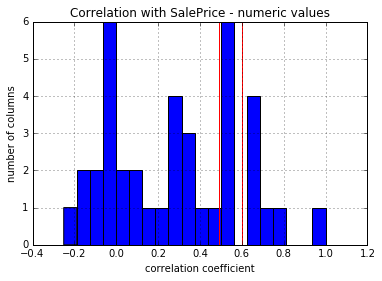

In [140]:
fig, ax=plt.subplots()

temp_df.corr().SalePrice.sort_values().hist(bins=20, ax=ax)
ax.set_title("Correlation with SalePrice - numeric values")
ax.axvline(x=.49, c="r")
ax.axvline(x=.6, c="r")
ax.set_xlabel("correlation coefficient")
ax.set_ylabel("number of columns")



I have plotted two red lines as two possible 'cutoffs' for the used columns. 
The two choices are thus:

    -Using the 6 columns that have correlation coefficient > 0.6.
<h1><center> or</h1></center>

    - Using 12 columns that have correlation coefficient >0.5.
    
For now, I would choose to go with the former, but as I have time - I shall try both approaches. /note that lower limit for the correlation was not defined since the strongest anticorrelation was about 0.2/



## Feature selection - Other values

In [141]:

df_non_num=df.select_dtypes(exclude=['integer', 'float'])
value_cols={}
for name in df_non_num.columns:
    value_cols[name]=(len(df_non_num[name].value_counts(dropna=False)))
pd.Series(value_cols).sort_values()

Street             2
Central Air        2
Alley              3
Paved Drive        3
Land Slope         3
Utilities          3
Garage Finish      4
Land Contour       4
Lot Shape          4
Exter Qual         4
Heating QC         5
Lot Config         5
Fence              5
Bsmt Exposure      5
Kitchen Qual       5
Exter Cond         5
Bldg Type          5
Pool QC            5
Bsmt Cond          6
Roof Style         6
Sale Condition     6
Misc Feature       6
Mas Vnr Type       6
Garage Qual        6
Bsmt Qual          6
Electrical         6
Garage Cond        6
Heating            6
Foundation         6
Fireplace Qu       6
BsmtFin Type 1     7
BsmtFin Type 2     7
Garage Type        7
MS Zoning          7
Functional         8
Condition 2        8
Roof Matl          8
House Style        8
Condition 1        9
Sale Type         10
Exterior 1st      16
Exterior 2nd      17
Neighborhood      28
dtype: int64

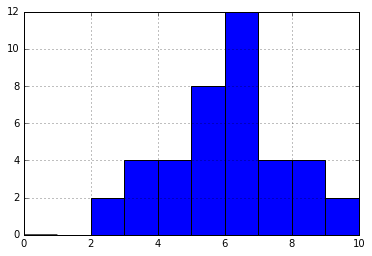

In [142]:
pd.Series(value_cols).hist(bins=10, range=[0,10])

From this, I would say that trying to give dummy values might be worth for the data with 5 or less categories. I will try this and look into how these values perform in correlation...

Now of course one has to be careful with these dummy values as they give a bunch more columns into the dataframe and will result in having many 0s and/or 1s - not very ideal for linear regression, but a 'higher level' model might use them better -, but it is worth a try.

In [143]:
can_dummies=pd.Series(value_cols)[pd.Series(value_cols)<6].index.values

In [144]:
dummy_frame=pd.DataFrame()
used_names=[]#This is needed so no duplicate col names will be present
for col in can_dummies:
    pseu_dummies=pd.get_dummies(df_non_num[col])
    for item in pseu_dummies.columns:#check for duplicates
        if item in used_names:
            pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
    used_names+=list(pseu_dummies.columns)
    dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)
dummy_frame

,Grvl,Pave,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Av,Gd,Mn,...,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Street_Grvl,Street_Pave,AllPub,NoSeWa,NoSewr
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
6,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
7,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


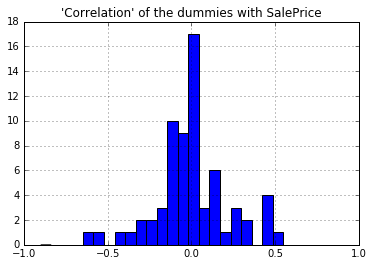

In [145]:
dummy_frame["price"]=df.SalePrice
dummy_frame.corr().price.hist(bins=30, range=[-.9,.99])#There wasn't anything outside this
plt.title("'Correlation' of the dummies with SalePrice")

There seem to be indeed at least a few dummies that correlates (and/or anticorrelates) quite well with the price. I suspect these are the ones with the fewest categories as the more categories will mean more zeros and less ones as dummies. 

Here one could dive deeper (one by one, if there isn't something better - I'm not sure e.g. PCA would work well with these dummies since they are not independent in groups, so there is chance that some good dummies would be excluded) to see _exactly_ which columns are good here, but I will just accept all these dummies - this is still less values than the guided project wants to keep, so yay?

## Second iteration on predictions

Note: Luckily, the 'leaky' values have kind of removed themselves from both the numerical and categorical instances. 

Now after a bit of selection among the features, I shall try to train a model once again using only these columns and see wheter I can get a closer prediction.

In [146]:


#Column names when more numeric columns are included
select_longer=list(temp_df.corr().SalePrice.sort_values()[temp_df.corr().SalePrice.sort_values()>.5].index)+list(dummy_frame.columns[:-1])

#Column names when less numeric columns are included
select_shorter=list(temp_df.corr().SalePrice.sort_values()[temp_df.corr().SalePrice.sort_values()>.6].index)+list(dummy_frame.columns[:-1])


def transform_features(data, dummies):# I still have no transform - except for the dummies, which I have already done.
    return pd.concat([data, dummies], axis=1)


def select_features(data, select):# Now I have to select, though this shall not be a long road
    return (data[select]).dropna()#select is either of the list I have generated above.
    #dropna is needed to drop the nan values reintroduced by the dummies

def train_and_test(data):
    #split - still not shuffling, but no k-fold yet either
    train=data.loc[:1460]
    test=data.loc[1460:]
    #Only numeric - this is not needed anymore I think
#    train = train.select_dtypes(include=['integer', 'float'])
#    test = test.select_dtypes(include=['integer', 'float'])

    not_sale = train.columns.drop("SalePrice")#drops the saleprice - it is not the last anymore
    #initiate model
    my_regressor = linear_model.LinearRegression()
    my_regressor.fit(train[not_sale], train["SalePrice"])#I really should transform to snake case...
    
    predictions = my_regressor.predict(test[not_sale])
    mse = mean_squared_error(test["SalePrice"], predictions)
    return np.sqrt(mse)

def run_through(data, dummies, select):#this will do all the work
    pseu_data=data.copy()#don't touch the original one
    pseu_d2=dummies.copy()
    pseu_data=transform_features(pseu_data, pseu_d2)
    pseu_data=select_features(pseu_data, select)
    rmse=train_and_test(pseu_data)
    print("RMSE: "+str(rmse))
    return rmse

print("With softer limit (more values):")
run_through(temp_df, dummy_frame, select_longer)

print("With harder limit (less values):")
run_through(temp_df, dummy_frame, select_shorter)




With softer limit (more values):
RMSE: 40813.19317295581
With harder limit (less values):
RMSE: 40751.22168159566


40751.22168159566

## Evaluation: Prediction 2

So... we kind of halved the error down, which is nice, but I believe we can go further with better feature selection (and through creating new, meaningful features).

## Feature engineering 2: 

### Categoric values:

I now would look into the categoric values a bit more in-depth (just to see whether they help or not at all):
    
    - Looking at the distributions of values: if a column has 95% a single value that might not help (or even overfit for the remaining 5%).
    - After this, looking at the "correlations" with price column-wise.
    - I shall also look at the columns with a bit more categorical value: They may offer more insight.
    
### Numerical values:
    
    - I think it is clear that including from .5 (instead of .6) corr. coefficient does not make it worse, in fact it does make the prediction just slightly better. Now granted, that improvement is well within the margin of error, so I wouldn't call it improvement, but it doesn't hurt... so I'm satisfied with it.
    - I shall try to use the not-useful values to generate new features that might represent the price better.

# Feature selection - categorical

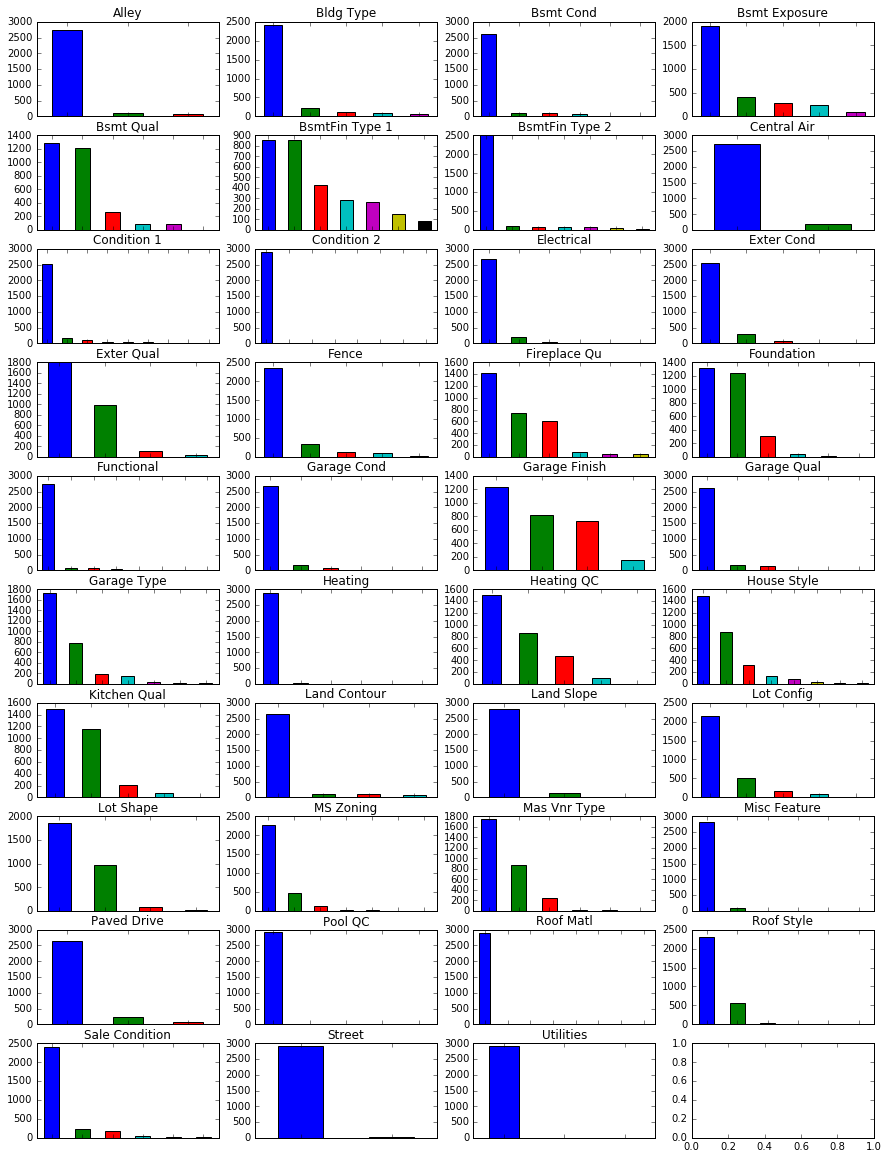

In [147]:
# Histograms - can_dummies up to 9, I might find something useful here
can_dummies=pd.Series(value_cols)[pd.Series(value_cols)<10].index.values
plt.subplots(10,4, figsize=(15,20))
sub=1
for col in can_dummies:
    ax=plt.subplot(10,4,sub)
    df_non_num[col].value_counts(dropna=False).plot(kind="bar", ax=ax)
    ax.set_title(col)
    ax.set_xticklabels("")
    sub+=1
    

This is a bunch (and the individual ticks are not present - for that, single plots would be optimal), but it illustrates well that most of the values could be either swapped out with one dummy column (the "main" value, with a 1/0=yes/no) or neglected. 

In some cases it is even more one-sided, since some of the 'blue' values can  - and do e.g. for "Alley" - represent the missing values. 

For this, I shall once again iterate - this time counting the values, and showing for each column the percentage the "most relevant" feature takes. 

/Note: I use the 'correlation' here very liberally, as we are talking about presence or absence of a variable from an equation/

In [148]:
diverse_dum=[]
uni_dum=[]
nan_dum=[]
for dumdum in can_dummies:
    counts=df_non_num[dumdum].value_counts(dropna=False)
#    print(dumdum +": first is "+ str(counts[0])+ ", all*08 are "+ str(sum(counts)*.8) )
    if counts[0]>sum(counts)*.8:#more than 80% is the largest value
        if pd.isna(counts.index[0]):# ...and that is nan
            print(dumdum + " is near useless")
        else:
            uni_dum.append(dumdum)
    else:#it is more diverse than that
        if pd.isna(counts.index[0]):#...but most is still missing
            nan_dum.append(dumdum)
        else:
            diverse_dum.append(dumdum)
            
print("Might be worth keeping: "+str(len(diverse_dum)))
print("The top might be good: "+str(len(uni_dum)))
print("Many nan, but not >80%: "+str(len(nan_dum)))
["Alley", "Fence", "Misc Feature" , "Pool QC"]

Alley is near useless
Fence is near useless
Misc Feature is near useless
Pool QC is near useless
Might be worth keeping: 15
The top might be good: 19
Many nan, but not >80%: 1


This did get rid of 4-5 (out of the 39) columns. 

Now to select further:
## Columns with multi-dummies: 

['Bsmt Qual',
 'BsmtFin Type 1',
 'Exter Qual',
 'Foundation',
 'Garage Finish',
 'Heating QC',
 'Kitchen Qual',
 'Mas Vnr Type']

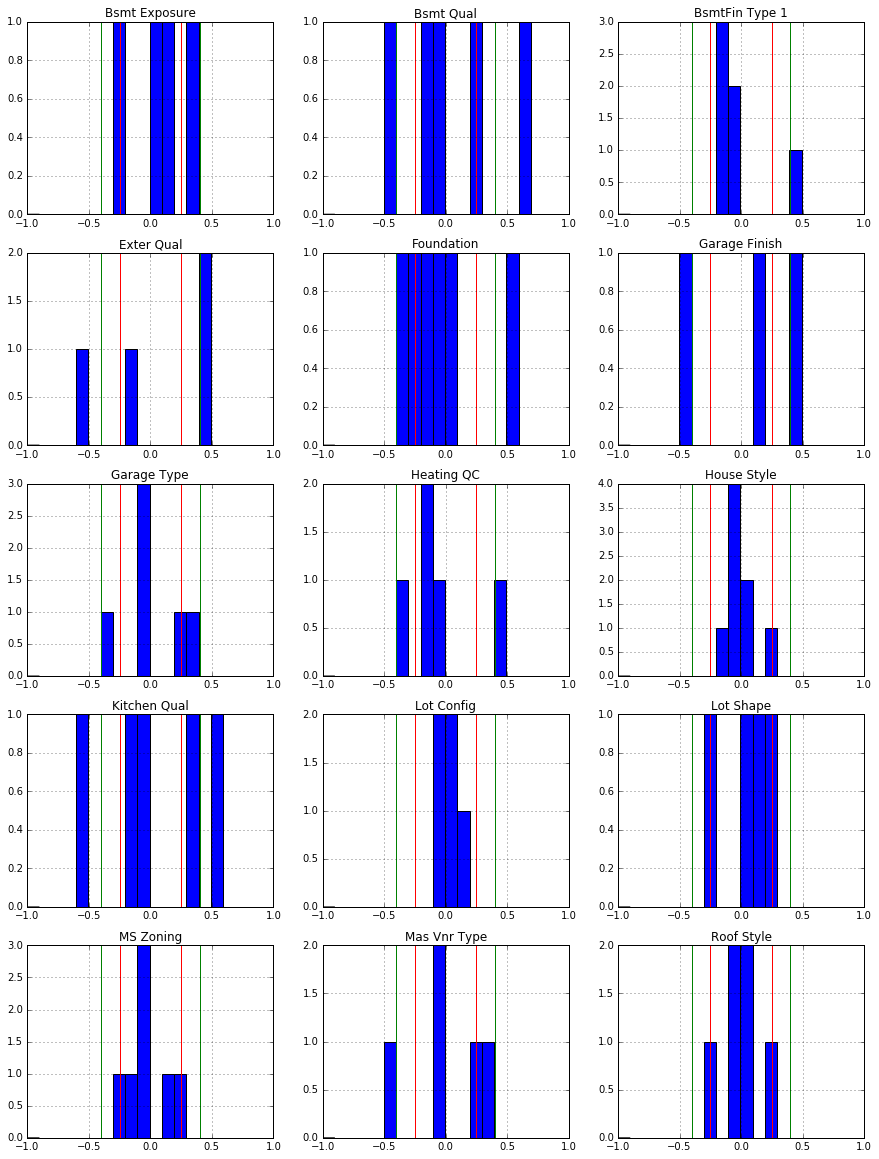

In [211]:
# correlations - first for diverse_dum
plt.subplots(5,3, figsize=(15,20))
sub=1
keep_whole=[]
for col in diverse_dum:
    ax=plt.subplot(5,3,sub)
    pseu_dum=pd.concat([pd.get_dummies(df_non_num[col]), df.SalePrice], axis=1)
    pseu_dum.corr().SalePrice.hist(bins=20,range=[-1,.99], ax=ax)
    ax.set_title(col)
    ax.axvline(.25, c="r")
    ax.axvline(-.25, c="r")
    ax.axvline(.4, c="g")
    ax.axvline(-.4, c="g")
    sub+=1
    if pseu_dum.corr().SalePrice.sort_values()[-2]>.4 or pseu_dum.corr().SalePrice.sort_values()[0]<-.4:# This is basically if we are out of the boundaries
        keep_whole.append(col)
keep_whole

## Multivariate dummies - Decision:

I did draw the line at +/- 0.4 and +/- 0.25 for these dummies to keep. I shall try both approaches and see which is better. This wants to mean I have kept the most meaningful dummies, and reduced the column number to 7 (8).

## Columns with 'single dummies':

Sale Condition   -0.141418
Land Contour     -0.076505
Roof Matl        -0.069966
Land Slope       -0.068527
Condition 2      -0.022217
Utilities         0.031032
Street            0.059519
Heating           0.079998
Condition 1       0.101302
Bldg Type         0.110180
Bsmt Cond         0.110261
BsmtFin Type 2    0.113448
Exter Cond        0.117391
Functional        0.119343
Electrical        0.239633
Garage Qual       0.255691
Central Air       0.264506
Paved Drive       0.273314
Garage Cond       0.276430
dtype: float64

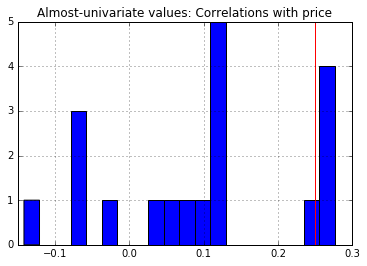

In [150]:
# correlations - first for diverse_dum

keep_top=[]
solo_dum={}
for col in uni_dum:
    counts=df_non_num[col].value_counts(dropna=False)
    pseu_dum=pd.concat([pd.get_dummies(df_non_num[col]), df.SalePrice], axis=1)
#    print(col + ": " + str(pseu_dum.corr().SalePrice[counts.index[0]]))
    solo_dum[col]=pseu_dum.corr().SalePrice[counts.index[0]]
    if pseu_dum.corr().SalePrice[counts.index[0]]>.25:
        keep_top.append(col)
fig, ax=plt.subplots()
pd.Series(solo_dum).hist(bins=20, ax=ax)

ax.axvline(.25, c="r")
ax.set_title("Almost-univariate values: Correlations with price")
pd.Series(solo_dum).sort_values()

## Univariate dummies - decision: 

I think I can keep the top value of the top 4 (with correlation > .25) from these as univariate dummies (so either 0/1, but no further classification for the rest values) as they may still help the regression.

## The "mainly 0" dummy:

For a single column ("fireplace q") I had more nan values than anything else, but the nans did not take over 80% of the data. I shall check on this to see if it is worth anything.

In [151]:
pseu_dum=pd.concat([pd.get_dummies(df_non_num[nan_dum[0]].replace(np.nan, "None")), df.SalePrice], axis=1)
pseu_dum.corr().SalePrice

Ex           0.250029
Fa          -0.028484
Gd           0.371630
None        -0.481446
Po          -0.061408
TA           0.150991
SalePrice    1.000000
Name: SalePrice, dtype: float64

In [152]:
df_non_num[nan_dum[0]].replace(np.nan, "None").value_counts()

None    1422
Gd       744
TA       600
Fa        75
Po        46
Ex        43
Name: Fireplace Qu, dtype: int64

## 'Mainly 0' dummy - decision:

After introduciong "none" instead of nan (as according to the documentation NA means 'no fireplace' and not 'no data'), the (anti-/)correlation seems to be strong for the top two values: None (almost -.5) and Gd. I shall keep these two, while disregard the rest (Ex. has moderately good correlation, but I will not build model on 43 instances...). 

This is also an effect I can see happening: the homes with fireplace might be the more 'stylish' ones and thus, more expensive. - or at least, they are guaranteed not to be just flats/one-room apartments.

## Building the new dummy frame

After the decisions are done, I build the new dataframe that contains only the "meaningful" dummies for me.

In [153]:
uni=keep_top#only the top is kept
dummy_frame=pd.DataFrame()
used_names=[]#This is needed so no duplicate col names will be present
for col in keep_whole:#the multivar dummies
    pseu_dummies=pd.get_dummies(df_non_num[col])
    for item in pseu_dummies.columns:#check for duplicates
        if item in used_names:
            pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
    used_names+=list(pseu_dummies.columns)
    dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)
for col in uni:#the univar dummies
    pseu_dummies=pd.get_dummies(df_non_num[col])
    counts=df_non_num[col].value_counts()#The dropna is no longer needed
    pseu_dummies=pseu_dummies[[counts.index[0]]]#Only keep this one
    for item in pseu_dummies.columns:#check for duplicates
        if item in used_names:
            pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
    used_names+=list(pseu_dummies.columns)
    dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)
    
for col in nan_dum:#the dual-var dummy - the fireplace
    pseu_dummies=pd.get_dummies(df_non_num[nan_dum[0]].replace(np.nan, "None"))
    counts=df_non_num[col].replace(np.nan, "None").value_counts()#The dropna is no longer needed
    pseu_dummies=pseu_dummies[counts.index[:2]]#Only keep this one
    for item in pseu_dummies.columns:#check for duplicates
        if item in used_names:
            pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
    used_names+=list(pseu_dummies.columns)
    dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)
    
dummy_frame

,Ex,Fa,Gd,Po,TA,ALQ,BLQ,GLQ,LwQ,Rec,...,BrkFace,Mas Vnr Type_CBlock,None,Mas Vnr Type_Stone,Y,Garage Cond_TA,Garage Qual_TA,Paved Drive_Y,Fireplace Qu_None,Fireplace Qu_Gd
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,1
1,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,1,1,1,1,0
2,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,1,1,1,1,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,1,1,1,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,1,0,0
5,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,1,1,1,0,1
6,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,1,1,0
7,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,1,1,1,1,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,1,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,1,1,1,0,0


## Categorical columns

I think this is my 3rd iteration for the categorical columns: 45 dummy values are still quite a lot, but further improvements are possible.

## Numerical columns: 

For the numerical columns I think we are in the clear, and further exclusion/inclusion of columns would just make the prediction less accurate. 

There is something one can do, however:  I can look into the excluded values and see if I can still extract value from them. 

'YR sold' might leak data (though the correlations suggest otherwise), but the years since building/renovation (if ever) would still provide useful info. 

I can define two new columns and see how they 'perform' with correlation: 

In [216]:
temp_df.corr().SalePrice.sort_values()[temp_df.corr().SalePrice.sort_values()>.4].index

Index(['TotRms AbvGrd', 'Mas Vnr Area', 'Garage Yr Blt', 'Full Bath',
       '1st Flr SF', 'Total Bsmt SF', 'Garage Area', 'Garage Cars',
       'Gr Liv Area', 'Overall Qual', 'SalePrice'],
      dtype='object')

In [168]:
since_remod=(temp_df["Yr Sold"]-temp_df["Year Remod/Add"])# This is needed as there were three negative values...
since_remod[since_remod<0]=0
since_remod.describe()

count    2274.000000
mean       22.895339
std        21.143957
min         0.000000
25%         4.000000
50%        14.000000
75%        43.000000
max        60.000000
dtype: float64

In [170]:
since_built=temp_df["Yr Sold"]-temp_df["Year Built"]
since_built[since_built<0]=0
since_built.describe()

count    2274.000000
mean       35.783641
std        30.798849
min         0.000000
25%         6.000000
50%        34.000000
75%        55.000000
max       129.000000
dtype: float64

Seem plausible, let's see how these values perform!

In [190]:
temp_df.assign(since_built=since_built)
temp_df.assign(since_remod=since_remod)
temp_df.corr().SalePrice.sort_values()#[temp_df.corr().SalePrice.sort_values()]

since_built       -0.560121
since_remod       -0.539922
PID               -0.251085
Overall Cond      -0.163471
Enclosed Porch    -0.142672
Kitchen AbvGr     -0.110926
MS SubClass       -0.079791
Bsmt Half Bath    -0.049921
Order             -0.042863
Low Qual Fin SF   -0.025686
Yr Sold           -0.022084
BsmtFin SF 2      -0.016609
Misc Val          -0.013360
3Ssn Porch         0.015433
Mo Sold            0.030758
Pool Area          0.067791
Screen Porch       0.108446
Bedroom AbvGr      0.147143
Bsmt Unf SF        0.199664
2nd Flr SF         0.252425
Half Bath          0.269068
Bsmt Full Bath     0.282927
Lot Area           0.309177
Open Porch SF      0.330339
Wood Deck SF       0.330650
Lot Frontage       0.351406
BsmtFin SF 1       0.435783
Fireplaces         0.461333
TotRms AbvGrd      0.523273
Mas Vnr Area       0.527794
Year Remod/Add     0.538240
Garage Yr Blt      0.541860
Year Built         0.559622
Full Bath          0.559935
1st Flr SF         0.638762
Total Bsmt SF      0

## New numerics:

These are the first two strong anti-correlating values! I mean it makes sence since "Yr built" and "Yr remod" already correlated well, but these are just a little bit better - so I shall swap them out. I don't think it is fair keeping both as they are redundant (almost counting with double weights on these columns!). 

## Iteration 03 - pipeline: 

I think I am ready for the final iteration of predictions. Still not using the k-fold validation, but otherwise I think I got where I wanted with the parameters used. 

This time I shall build the pipeline from "ground up", as in I will pass the original (so far unchanged) df and let the transform & select functions take care of it. 

In order to do this, I shall hard-code the used column names into this segment - since it should be independent of anything else that happened in this notebook. It should be able to evaluate if I read a new csv into _df_.

In [179]:
nan_dum

['Fireplace Qu']

In [286]:
#a function that generates the dummies from the original df
used_cols=['TotRms AbvGrd', 'Mas Vnr Area', 'since_remod',
       'Garage Yr Blt', 'Full Bath', 'since_built', 
        'Garage Area', 'Garage Cars', 
       'Overall Qual', 'SalePrice']
def dummy_creation(df_non_num):
    uni=['Garage Cond']#only the top is kept
    keep_whole=['Bsmt Qual',
 'BsmtFin Type 1',
 'Exter Qual',
 'Foundation',
 'Garage Finish',
 'Heating QC',
 'Kitchen Qual',
 'Mas Vnr Type']+[ "Alley","Pool QC"]+['Central Air', 'Garage Qual']
    nan_dum=['Fireplace Qu']
    dummy_frame=pd.DataFrame()
    used_names=[]#This is needed so no duplicate col names will be present
    for col in keep_whole:#the multivar dummies
        pseu_dummies=pd.get_dummies(df_non_num[col])
        for item in pseu_dummies.columns:#check for duplicates
            if item in used_names:
                pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
        used_names+=list(pseu_dummies.columns)
        dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)
        
    for col in uni:#the univar dummies
        pseu_dummies=pd.get_dummies(df_non_num[col])
        counts=df_non_num[col].value_counts()#The dropna is no longer needed
        pseu_dummies=pseu_dummies[[counts.index[0]]]#Only keep this one
        for item in pseu_dummies.columns:#check for duplicates
            if item in used_names:
                pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
        used_names+=list(pseu_dummies.columns)
        dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)

    for col in nan_dum:#the dual-var dummy - the fireplace
        pseu_dummies=pd.get_dummies(df_non_num[nan_dum[0]].replace(np.nan, "None"))
        counts=df_non_num[col].replace(np.nan, "None").value_counts()#The dropna is no longer needed
        pseu_dummies=pseu_dummies[counts.index[:2]]#Only keep this one
        for item in pseu_dummies.columns:#check for duplicates
            if item in used_names:
                pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
        used_names+=list(pseu_dummies.columns)
        dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)
    return dummy_frame

#a function that selects the numeric features we found good enough - subject to change 
def select_numerics(df, used_cols):
    temp_df=df.dropna(subset=(df.describe().columns[(df.describe().loc["count",].values!=2930)]).values)

    built_age=temp_df["Yr Sold"]-temp_df["Year Built"]
    built_age[built_age<0]=0
    built_age=(temp_df["Yr Sold"]-temp_df["Year Remod/Add"])# This is needed as there were three negative values...
    built_age[built_age<0]=0
    temp_df=temp_df.assign(since_built=built_age)
    temp_df=temp_df.assign(since_remod=built_age)
    temp_df=temp_df[used_cols]
    return temp_df

def transform_features(df, used_cols):# This just calls the two functions above and concats...
    numerics=select_numerics(df, used_cols)
    dummies=dummy_creation(df)#since the columns are coded into the functions, 
    return pd.concat([numerics, dummies], axis=1).dropna()

# I have retired the select features column as the transform takes care of that.


def train_and_test(data):
    #split - still not shuffling, but no k-fold yet either
    train=data.loc[:1460]
    test=data.loc[1460:]
    #Only numeric - this is not needed anymore I think
#    train = train.select_dtypes(include=['integer', 'float'])
#    test = test.select_dtypes(include=['integer', 'float'])

    not_sale = train.columns.drop("SalePrice")#drops the saleprice - it is not the last anymore
    #initiate model
    my_regressor = linear_model.LinearRegression()
    my_regressor.fit(train[not_sale], train["SalePrice"])#I really should transform to snake case...
    
    predictions = my_regressor.predict(test[not_sale])
    mse = mean_squared_error(test["SalePrice"], predictions)
    return np.sqrt(mse)

def run_through(data, used_cols):#this will do all the work
    pseu_data=data.copy()#don't touch the original one
    pseu_data=transform_features(pseu_data, used_cols)
#    pseu_data=select_features(pseu_data, select)
    rmse=train_and_test(pseu_data)
    print("RMSE: "+str(rmse))
    return rmse

run_through(df, used_cols)

RMSE: 38548.43812325591


38548.43812325591


## K-fold cross validation:

As a last effort I shall introduce k-fold elimination to the train_and_test function and see how that does.

In [298]:
#a function that generates the dummies from the original df
used_cols=['TotRms AbvGrd', 'Mas Vnr Area', 'since_remod',
       'Garage Yr Blt', 'Full Bath', 'since_built', '1st Flr SF',
       'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Gr Liv Area',
       'Overall Qual', 'SalePrice']
def dummy_creation(df_non_num):
    uni=['Garage Cond']#only the top is kept
    keep_whole=['Bsmt Qual',
 'BsmtFin Type 1',
 'Exter Qual',
 'Foundation',
 'Garage Finish',
 'Heating QC',
 'Kitchen Qual',
 'Mas Vnr Type']+[ "Alley","Pool QC"]+['Central Air', 'Garage Qual']
    nan_dum=['Fireplace Qu']
    dummy_frame=pd.DataFrame()
    used_names=[]#This is needed so no duplicate col names will be present
    for col in keep_whole:#the multivar dummies
        pseu_dummies=pd.get_dummies(df_non_num[col])
        for item in pseu_dummies.columns:#check for duplicates
            if item in used_names:
                pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
        used_names+=list(pseu_dummies.columns)
        dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)
        
    for col in uni:#the univar dummies
        pseu_dummies=pd.get_dummies(df_non_num[col])
        counts=df_non_num[col].value_counts()#The dropna is no longer needed
        pseu_dummies=pseu_dummies[[counts.index[0]]]#Only keep this one
        for item in pseu_dummies.columns:#check for duplicates
            if item in used_names:
                pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
        used_names+=list(pseu_dummies.columns)
        dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)

    for col in nan_dum:#the dual-var dummy - the fireplace
        pseu_dummies=pd.get_dummies(df_non_num[nan_dum[0]].replace(np.nan, "None"))
        counts=df_non_num[col].replace(np.nan, "None").value_counts()#The dropna is no longer needed
        pseu_dummies=pseu_dummies[counts.index[:2]]#Only keep this one
        for item in pseu_dummies.columns:#check for duplicates
            if item in used_names:
                pseu_dummies.rename(columns={item : col + "_" + item}, inplace=True)
        used_names+=list(pseu_dummies.columns)
        dummy_frame=pd.concat([dummy_frame, pseu_dummies ], axis=1)
    return dummy_frame

#a function that selects the numeric features we found good enough - subject to change 
def select_numerics(df, used_cols):
    temp_df=df.dropna(subset=(df.describe().columns[(df.describe().loc["count",].values!=2930)]).values)

    built_age=temp_df["Yr Sold"]-temp_df["Year Built"]
    built_age[built_age<0]=0
    built_age=(temp_df["Yr Sold"]-temp_df["Year Remod/Add"])# This is needed as there were three negative values...
    built_age[built_age<0]=0
    temp_df=temp_df.assign(since_built=built_age)
    temp_df=temp_df.assign(since_remod=built_age)
    temp_df=temp_df[used_cols]
    return temp_df

def transform_features(df, used_cols):# This just calls the two functions above and concats...
    numerics=select_numerics(df, used_cols)
    dummies=dummy_creation(df)#since the columns are coded into the functions, 
    return pd.concat([numerics, dummies], axis=1).dropna()

# I have retired the select features column as the transform takes care of that.


def train_and_test(data, k=0):
    not_sale = data.columns.drop("SalePrice")#drops the saleprice - it is not the last anymore
    if k==0:
        #split - still not shuffling, but no k-fold yet either

        train=data.loc[:1460]
        test=data.loc[1460:]
        #Only numeric - this is not needed anymore I think
    #    train = train.select_dtypes(include=['integer', 'float'])
    #    test = test.select_dtypes(include=['integer', 'float'])
        #initiate model
        my_regressor = linear_model.LinearRegression()
        my_regressor.fit(train[not_sale], train["SalePrice"])#I really should transform to snake case...

        predictions = my_regressor.predict(test[not_sale])
        mse = mean_squared_error(test["SalePrice"], predictions)
        return np.sqrt(mse)
    
    if k==1:#perform simple cross-validation - still without KFold 
        #I mean... I understand this is the task to be sure we understand cross-val...
        fold_one=data.loc[:1460]
        fold_two=data.loc[1460:]
        rmse=[]
        #one validation
        my_regressor = linear_model.LinearRegression()
        my_regressor.fit(fold_one[not_sale], fold_one["SalePrice"])#I really should transform to snake case...
        predictions = my_regressor.predict(fold_two[not_sale])
        rmse.append(np.sqrt(mean_squared_error(fold_two["SalePrice"], predictions)))
        my_regressor.fit(fold_two[not_sale], fold_two["SalePrice"])#I really should transform to snake case...
        predictions = my_regressor.predict(fold_one[not_sale])
        rmse.append(np.sqrt(mean_squared_error(fold_one["SalePrice"], predictions)))
        return np.mean(rmse)
    else:
        my_kf = KFold(n_splits=k, shuffle=True)
        rmse = []
        my_regressor=linear_model.LinearRegression()
        for train_idx, test_idx in my_kf.split(data):
            train = data.iloc[train_idx]
            test = data.iloc[test_idx]
            my_regressor.fit(train[not_sale], train["SalePrice"])
            predictions = my_regressor.predict(test[not_sale])
            rmse.append(np.sqrt(mean_squared_error(test["SalePrice"], predictions)))
        print("At the end of "+str(k)+"-fold validation, the RMSE for the segments:" +str(rmse))
        return np.mean(rmse)
        

def run_through(data, used_cols, kfold):#this will do all the work
    pseu_data=data.copy()#don't touch the original one
    pseu_data=transform_features(pseu_data, used_cols)
#    pseu_data=select_features(pseu_data, select)
    rmse=train_and_test(pseu_data, k=kfold)
    print("With K="+str(kfold)+" RMSE: "+str(rmse))
    return rmse

for i in range(6):
    run_through(df, used_cols, i)

With K=0 RMSE: 40649.23362224916
With K=1 RMSE: 35200.98803427634
At the end of 2-fold validation, the RMSE for the segments:[32336.470155554693, 37460.22046767646]
With K=2 RMSE: 34898.34531161557
At the end of 3-fold validation, the RMSE for the segments:[34746.808352474545, 35240.39281384739, 31979.878004979397]
With K=3 RMSE: 33989.02639043378
At the end of 4-fold validation, the RMSE for the segments:[35132.13727056629, 47803.66503817348, 29071.152497250936, 36664.62478247667]
With K=4 RMSE: 37167.89489711684
At the end of 5-fold validation, the RMSE for the segments:[29958.516410018347, 28317.562547243117, 41504.89474224665, 37925.32353127659, 34196.9241977841]
With K=5 RMSE: 34380.644285713766


## Discussion

This would be the end of present project. We have managed to bring the error down to 30 000 $, which is about 1/6th of the mean price for houses in this project (and about 1/3rd of the standard deviation). I think there is more to be done for a more accurate prediction, but for starters this is a nice increase from the first prediction.

I liked this project a bit more than the previous ones as it did not feel as "railroaded" as the others, but in turn it took much more time - I might not finish what I intended during the free week.

 

## Improvements

The project could be improved through better feature selection (This may be achieved through *R*ecursive *F*eature *E*limination - RFE - or some other means), or through employing more complicated (or simply just... more - as 'stacking predictions' seems to be a successful method nowadays in Kaggle competitions) models. 
